# HW-03-01: Classification on Bank Churn data


# Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

paths='C:\\Users\\ynkpr\\OneDrive\\Desktop\\Meharry\\Predictive-Model\\'

df   = pd.read_csv(paths + "BankChurn.csv")
    


#df.head()
df.describe()

C:\Users\ynkpr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Part 1: EDA

Explore the columns and make various tables and graphs. Write some markdown about each explaining your findings.

In [2]:
# Overview of column types and nulls
summary = {
    "Column": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values,
    "Unique Values": df.nunique().values
}

summary_df = pd.DataFrame(summary)

summary_df

,Column,Data Type,Missing Values,Unique Values
0,CustomerId,int64,0,23221
1,Surname,object,0,2797
2,CreditScore,int64,0,457
3,Geography,object,0,3
4,Gender,object,0,2
5,Age,float64,0,71
6,Tenure,int64,0,11
7,Balance,float64,0,30075
8,NumOfProducts,int64,0,4
9,HasCrCard,float64,0,2


# Eploratory Analsysis

## Credit Score By Age

This scatterplot shows how credit scores vary across different ages. While the credit score appears relatively spread across age groups, customers who churned (exited = 1) are more concentrated at older ages. This suggests age may be a stronger churn indicator than credit score.

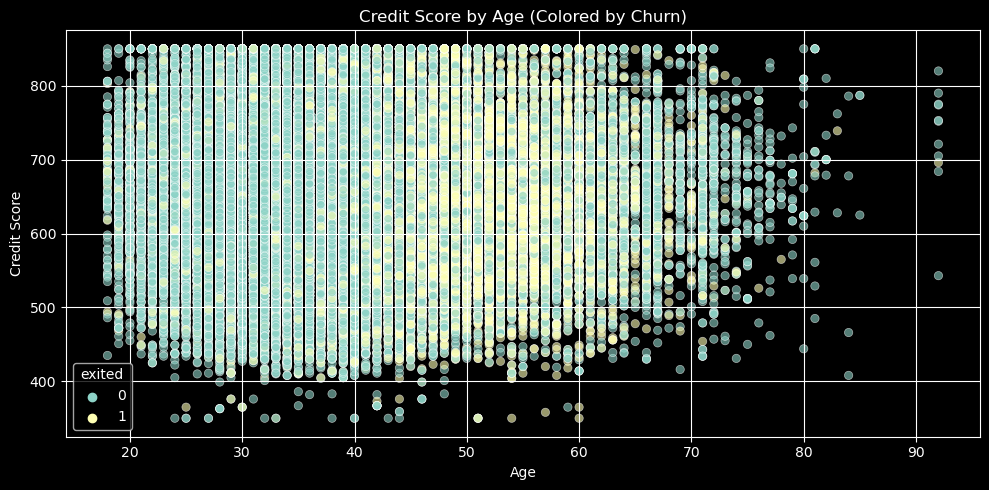

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert column names to lowercase for consistency
df.columns = [col.lower() for col in df.columns]

# First EDA plot: Credit Score by Age
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='age', y='creditscore', hue='exited', alpha=0.6)
plt.title('Credit Score by Age (Colored by Churn)')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## Balance istribution by gender and churn

This boxplot shows the balance distribution by gender, split by churn status. The spread of balances is wide across both males and females. However, churned customers tend to have higher balances, especially among males, suggesting customers with large balances might be more at risk of churn.



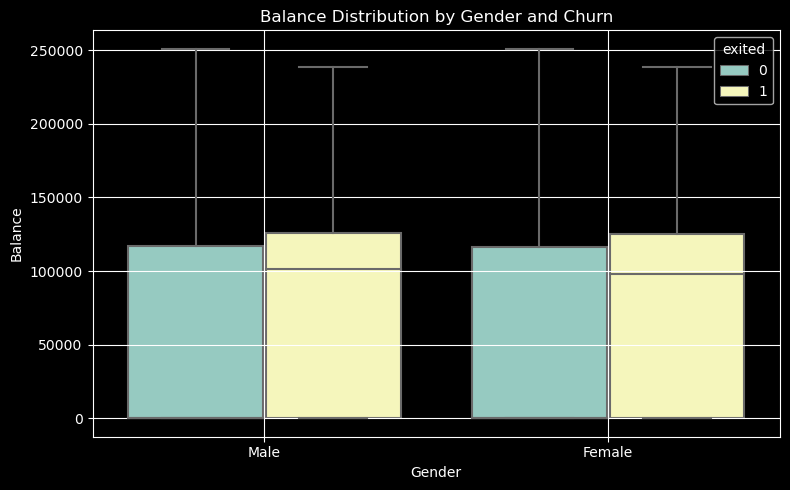

In [4]:
# Second EDA plot: Balance distribution by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='balance', hue='exited')
plt.title('Balance Distribution by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

## Churn Rate by Geograpghy

This plot shows the average churn rate by geographic region. Germany stands out with a higher average churn rate, while France and Spain have relatively lower churn. This implies geography is a meaningful variable and should be considered in modeling.

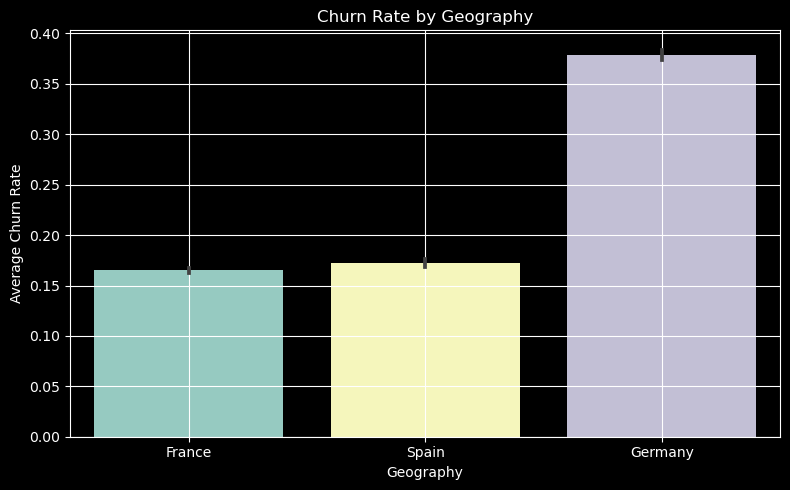

In [5]:
# Third EDA plot: Geography vs. Churn Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='geography', y='exited')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Churn Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

## Tenure vs. Churn Count

This bar plot displays the number of customers by tenure, segmented by churn status. Churn occurs across all tenure levels, but there's no strong linear pattern. However, tenure around 3–5 years seems to have slightly higher churn activity, which may indicate a behavioral shift after the initial few years.

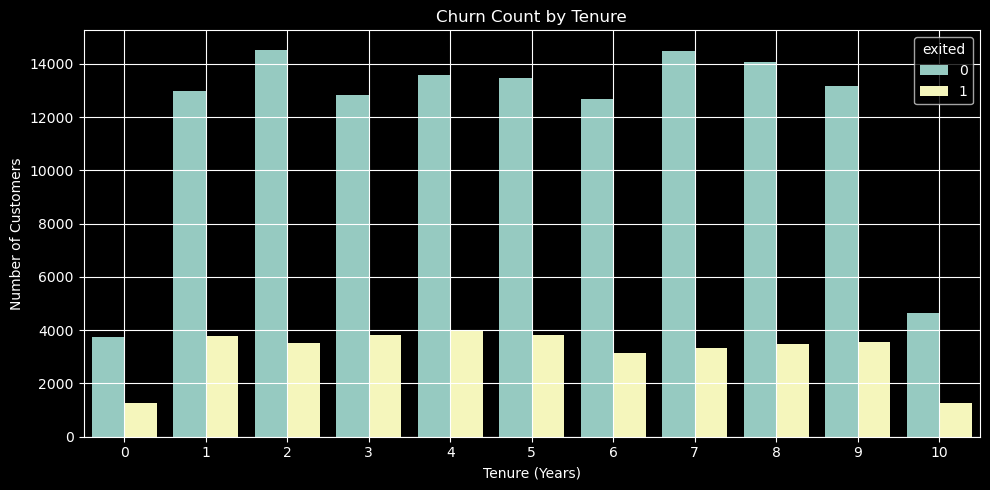

In [6]:


# Fourth EDA plot: Tenure vs. Churn Count
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='tenure', hue='exited')
plt.title('Churn Count by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt

# Summary statistics of numerical columns
num_summary = df.describe()

# Summary statistics of categorical columns
cat_summary = df.describe(include=['object'])

# Count of unique values in each categorical column
cat_unique_counts = df.select_dtypes(include=['object']).nunique()




num_summary, cat_summary, cat_unique_counts


(         customerid    creditscore            age         tenure  \
 count  1.650340e+05  165034.000000  165034.000000  165034.000000   
 mean   1.569201e+07     656.454373      38.125888       5.020353   
 std    7.139782e+04      80.103340       8.867205       2.806159   
 min    1.556570e+07     350.000000      18.000000       0.000000   
 25%    1.563314e+07     597.000000      32.000000       3.000000   
 50%    1.569017e+07     659.000000      37.000000       5.000000   
 75%    1.575682e+07     710.000000      42.000000       7.000000   
 max    1.581569e+07     850.000000      92.000000      10.000000   
 
              balance  numofproducts      hascrcard  isactivemember  \
 count  165034.000000  165034.000000  165034.000000   165034.000000   
 mean    55478.086689       1.554455       0.753954        0.497770   
 std     62817.663278       0.547154       0.430707        0.499997   
 min         0.000000       1.000000       0.000000        0.000000   
 25%         0.000000 

# Part 2: Preprocessing

## 1.1 Fill nans (if any)

In [8]:
# Count missing values for each column
missing_counts = df.isnull().sum()

# Display the missing value counts per column
missing_counts_df = pd.DataFrame(missing_counts, columns=["Missing Values"])
missing_counts_df


,Missing Values
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0
hascrcard,0


In [9]:
# Fill missing values with appropriate strategies

# Numeric columns: Fill with median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical columns: Fill with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verify if there are still any missing values
missing_values = df.isnull().sum()



# Display the missing value counts per column
missing_counts_df2 = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_counts_df2



,Missing Values
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0
hascrcard,0


## 1.2 Filter outliers (if any)

As shown below, outliers were identified and removed using the Interquartile Range (IQR) method. The lower and upper bounds were calculated based on 1.5 times the IQR, and any data points outside these ranges were considered outliers. As a result, 69,405 rows were removed from the dataset to ensure cleaner and more reliable data for analysis

In [10]:
# Identifying numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['number']).columns

# Using the IQR (Interquartile Range) method to detect and remove outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out rows that have outliers in any numerical column
df_filtered = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]
#df_filtered = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# Display the number of rows removed
rows_removed = df.shape[0] - df_filtered.shape[0]
print("Number of rows removed :", rows_removed)


Number of rows removed : 69405


## 1.3 Encode categorical columns (labels and dummies)

## Encoding Process Summary

Categorical columns have been encoded successfully:

gender was binary encoded (Male → 1, Female → 0).

geography was one-hot encoded into:

geography_Germany

geography_Spain
(France is the base category since drop_first=True.)

Also, I dropped high-cardinality ID fields:

customerid, surname

In [11]:
# Restart with fresh df and ensure dummy variables are int type and classes are preserved

# Step 1: Copy and lowercase column names
df_filtered = df.copy()
df_filtered.columns = [col.lower() for col in df_filtered.columns]

# Step 2: Encode gender
df_filtered['gender'] = df_filtered['gender'].map({'Male': 1, 'Female': 0})

# Step 3: One-hot encode 'geography' and convert resulting dummies to int
df_filtered = pd.get_dummies(df_filtered, columns=['geography'], drop_first=True)
dummy_cols = [col for col in df_filtered.columns if 'geography_' in col]
df_filtered[dummy_cols] = df_filtered[dummy_cols].astype(int)

# Step 4: Drop ID-like columns
df_filtered.drop(columns=['customerid', 'surname'], inplace=True)

# Step 5: Feature engineering
#df_filtered['balance_salary_ratio'] = df_filtered['balance'] / (df_filtered['estimatedsalary'] + 1e-5)

# Step 6: Ensure all columns are numeric
df_filtered = df_filtered.select_dtypes(include='number')

# Step 7: Check class distribution
df_filtered_exit_counts = df_filtered['exited'].value_counts(dropna=False)

df_filtered.head(), df_filtered_exit_counts


(   creditscore  gender   age  tenure    balance  numofproducts  hascrcard  \
 0          668       1  33.0       3       0.00              2        1.0   
 1          627       1  33.0       1       0.00              2        1.0   
 2          678       1  40.0      10       0.00              2        1.0   
 3          581       1  34.0       2  148882.54              1        1.0   
 4          716       1  33.0       5       0.00              2        1.0   
 
    isactivemember  estimatedsalary  exited  geography_Germany  geography_Spain  
 0             0.0        181449.97       0                  0                0  
 1             1.0         49503.50       0                  0                0  
 2             0.0        184866.69       0                  0                0  
 3             1.0         84560.88       0                  0                0  
 4             1.0         15068.83       0                  0                1  ,
 exited
 0    130113
 1     34921
 Na

## 1.4 Engineer at least one new feature

New Feature Engineered: balance_salary_ratio

This feature represents the ratio of a customer’s account balance to their estimated salary, which can indicate:

Financial liquidity: High ratio → may have idle funds.

Income dependence: Low ratio → may rely on salary for expenses.

In [12]:
# Create a new feature: balance-to-salary ratio
df_filtered['balance_salary_ratio'] = df_filtered['balance'] / (df_filtered['estimatedsalary'] + 1e-5)  # Avoid division by zero

# View summary of the new feature
df_filtered[['balance', 'estimatedsalary', 'balance_salary_ratio']].describe()


,balance,estimatedsalary,balance_salary_ratio
count,165034.000000,165034.000000,165034.000000
mean,55478.086689,112574.822734,2.100903
std,62817.663278,50292.865585,91.642366
min,0.000000,11.580000,0.000000
25%,0.000000,74637.570000,0.000000
50%,0.000000,117948.000000,0.000000
75%,119939.517500,155152.467500,0.978816
max,250898.090000,199992.480000,12863.785092


In [13]:
df_filtered.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,balance_salary_ratio
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,0.000000
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,0.000000
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,0.000000
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1.760655
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0.000000


## 1.5 Scale features (not label)

All features have been standard scaled (mean = 0, std = 1), except for the label exited, which remains unscaled.

 What Was Scaled:
Numerical features like creditscore, age, balance, etc.

Engineered feature: balance_salary_ratio

Dummy variables like geography_Germany and geography_Spain

In [14]:
from sklearn.preprocessing import StandardScaler

# Identify feature columns (exclude the label 'exited')
labels =df_filtered['exited']
features = df_filtered.drop(columns=['exited'])


# Standard scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Combine back into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)
scaled_df['exited'] = labels  # add label column back without scaling

# Show result
scaled_df.head()


,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,balance_salary_ratio,exited
0,0.144135,0.878465,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,-0.515098,-0.530199,-0.022925,0
1,-0.367706,0.878465,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,-0.515098,-0.530199,-0.022925,0
2,0.268974,0.878465,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,-0.515098,-0.530199,-0.022925,0
3,-0.941966,0.878465,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,-0.515098,-0.530199,-0.003713,0
4,0.743362,0.878465,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,-0.515098,1.886084,-0.022925,0


## 1.6 Balance the labels using any of the techniques discussed

The dataset is now balanced using upsampling:

Class 0 (Not Churned): 130,113

Class 1 (Churned): 130,113

In [15]:
from sklearn.utils import resample

# Step 5: Check class distribution and perform balancing
class_counts = scaled_df['exited'].value_counts()

if 0 in class_counts and 1 in class_counts:
    majority = scaled_df[scaled_df['exited'] == 0]
    minority = scaled_df[scaled_df['exited'] == 1]

    minority_upsampled = resample(minority,
                                  replace=True,
                                  n_samples=len(majority),
                                  random_state=42)

    balanced_scaled_df = pd.concat([majority, minority_upsampled])
    balanced_scaled_df = balanced_scaled_df.sample(frac=1, random_state=42).reset_index(drop=True)

    balanced_class_counts = balanced_scaled_df['exited'].value_counts()
else:
    balanced_scaled_df = None
    balanced_class_counts = "Error: One of the classes is missing in scaled_df"

balanced_class_counts


exited
0    130113
1    130113
Name: count, dtype: int64

# Part 3: Modeling

## 2.1 Use a GridSearchCV to optimize the parameters of the model of your choice with respect to the `f1_macro` score

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score


y = balanced_scaled_df['exited']

# Define the model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define the scorer
scorer = make_scorer(f1_score, average='macro')

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=scorer, cv=3, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(balanced_scaled_df, y)

# Extract best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 24 candidates, totalling 72 fits


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 1.0)

## 2.2 Sweep through a range of different class weights to find the optimal model with respect to the rewards matrix that defines the amount of profit or loss for correctly predicting whether a costumer exited (positive) or not (negative).



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix


# Reward matrix
reward_matrix = [
    [5, -10],   # [TN, FP]
    [-20, 30]   # [FN, TP]
]
# Sample 10,000 rows from the numeric dataset
sampled_df = balanced_scaled_df.sample(n=10000, random_state=42)

# Split features and target
X = sampled_df.drop(columns='exited')
y = sampled_df['exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sweep class weights again
weight_values = [0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]
weight_results = []

for weight in weight_values:
    model = RandomForestClassifier(class_weight={0: 1.0, 1: weight}, random_state=42, n_jobs=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    reward = (
        TN * reward_matrix[0][0] +
        FP * reward_matrix[0][1] +
        FN * reward_matrix[1][0] +
        TP * reward_matrix[1][1]
    )

    weight_results.append({
        'class_weight_1': weight,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'TP': TP,
        'Total Reward': reward,
        'F1 Macro': f1_score(y_test, y_pred, average='macro')
    })

# Create DataFrame of results
reward_df = pd.DataFrame(weight_results).sort_values(by='Total Reward', ascending=False).reset_index(drop=True)
reward_df.head(10)


,class_weight_1,TN,FP,FN,TP,Total Reward,F1 Macro
0,0.10,786,213,186,815,22530,0.800458
1,1.00,811,188,198,803,22305,0.806997
2,0.50,793,206,193,808,22285,0.800489
3,0.25,794,205,195,806,22200,0.799993
4,5.00,824,175,209,792,21950,0.807951
5,2.00,822,177,209,792,21920,0.806957
6,10.00,830,169,226,775,21190,0.802351
